23_neda_mimfpt_(ML_LGBMC)

Engin Abdan

### Libraries

In [27]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc, roc_curve

from lightgbm import LGBMClassifier

from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [28]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [29]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [30]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [31]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0


### Data Balance

In [32]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [33]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [34]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [35]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

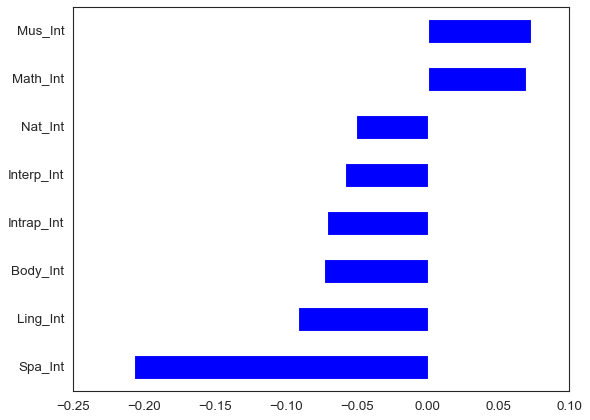

In [36]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### LGBMC & Model

In [38]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(x_train, y_train)

LGBMClassifier(random_state=42)

In [39]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [40]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[15 11]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        26
           1       0.80      1.00      0.89        44

    accuracy                           0.84        70
   macro avg       0.90      0.79      0.81        70
weighted avg       0.87      0.84      0.83        70



In [41]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 5 11]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.50      0.79      0.61        14

    accuracy                           0.53        30
   macro avg       0.56      0.55      0.51        30
weighted avg       0.57      0.53      0.51        30



### LGBMC & CV

In [42]:
model = LGBMClassifier(random_state=42)

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring = ["accuracy",
                                   "precision_macro",
                                   "recall_macro",
                                   "f1_macro"],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
df_scores.mean()[2:]

    fit_time  score_time  test_accuracy  test_precision_macro  \
1   0.047994    0.016001       0.714286              0.650000   
2   0.040000    0.008032       0.428571              0.300000   
3   0.031996    0.016007       0.857143              0.916667   
4   0.151992    0.046067       0.857143              0.916667   
5   0.056000    0.040032       0.714286              0.833333   
6   0.031965    0.016000       0.428571              0.416667   
7   0.032199    0.008005       0.571429              0.583333   
8   0.032004    0.007993       0.571429              0.550000   
9   0.032001    0.008001       0.571429              0.285714   
10  0.032006    0.016028       0.714286              0.833333   

    test_recall_macro  test_f1_macro  
1            0.650000       0.650000  
2            0.300000       0.300000  
3            0.750000       0.787879  
4            0.750000       0.787879  
5            0.666667       0.650000  
6            0.416667       0.416667  
7          

test_accuracy           0.642857
test_precision_macro    0.628571
test_recall_macro       0.582500
test_f1_macro           0.571082
dtype: float64

### LGBMC & GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [44]:
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}

In [45]:
model = LGBMClassifier(random_state=42)

grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",
                          n_jobs = -1,
                          verbose = 2)

In [46]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.2, 0.3],
                         'learning_rate': [0.005, 0.1, 0.15],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 1]},
             scoring='accuracy', verbose=2)

In [47]:
grid_model.best_estimator_

LGBMClassifier(colsample_bytree=0.2, learning_rate=0.005, max_depth=1,
               random_state=42, subsample=0.5)

In [48]:
grid_model.best_params_

{'colsample_bytree': 0.2,
 'learning_rate': 0.005,
 'max_depth': 1,
 'n_estimators': 100,
 'subsample': 0.5}

In [49]:
y_test_pred = grid_model.predict(x_test)
y_train_pred = grid_model.predict(x_train)

In [50]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[ 0 26]
 [ 0 44]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.63      1.00      0.77        44

    accuracy                           0.63        70
   macro avg       0.31      0.50      0.39        70
weighted avg       0.40      0.63      0.49        70



In [51]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 0 16]
 [ 0 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



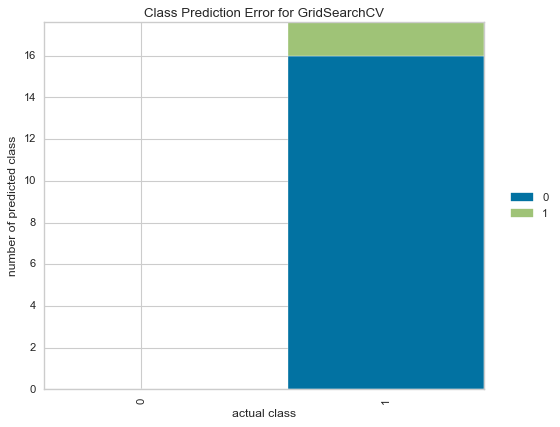

In [52]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(grid_model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Best Number of "n_estimators"

In [54]:
error_rates = []

for n in range(1,300):
    model = LGBMClassifier(n_estimators = n,
                           learning_rate = 0.005,
                           max_depth = 1,
                           colsample_bytree = 0.2,
                           subsample = 0.5)
    model.fit(x_train,y_train)
    test_preds = model.predict(x_test)
    err = 1 - accuracy_score(y_test, test_preds)
    
    error_rates.append(err)

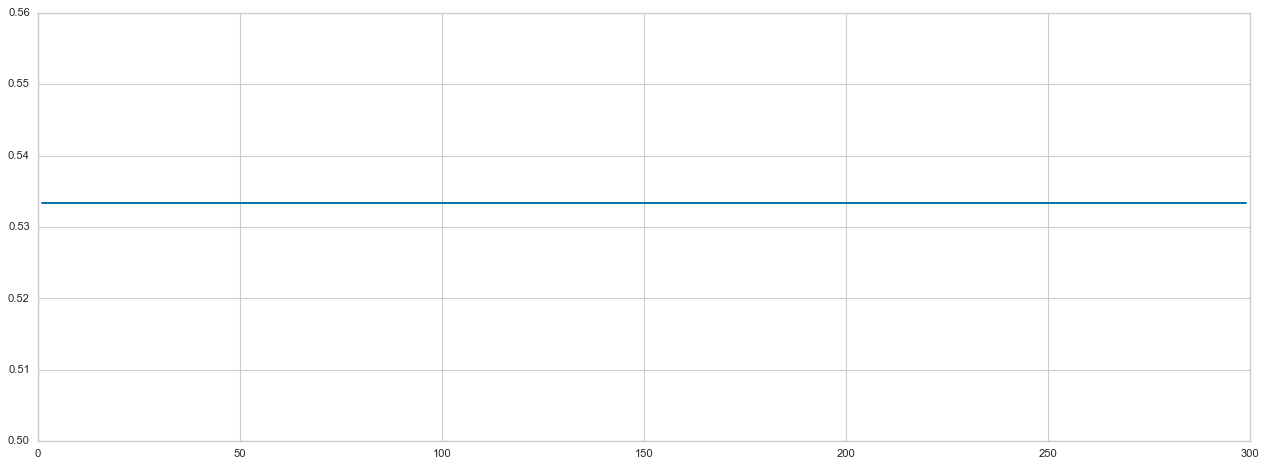

In [56]:
plt.figure(figsize=(16,6))
plt.plot(range(1,300), error_rates)
plt.tight_layout();

### Feature Importances

In [57]:
model = LGBMClassifier(n_estimators = 100,
                       learning_rate = 0.005,
                       max_depth = 1,
                       colsample_bytree = 0.2,
                       subsample = 0.5)
model.fit(x_train,y_train)

Feat_Imp = pd.DataFrame(index = x.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
Feat_Imp

,Feat_Imp
Ling_Int,0
Mus_Int,3
Math_Int,5
Body_Int,5
Intrap_Int,11
Interp_Int,15
Spa_Int,28
Nat_Int,33


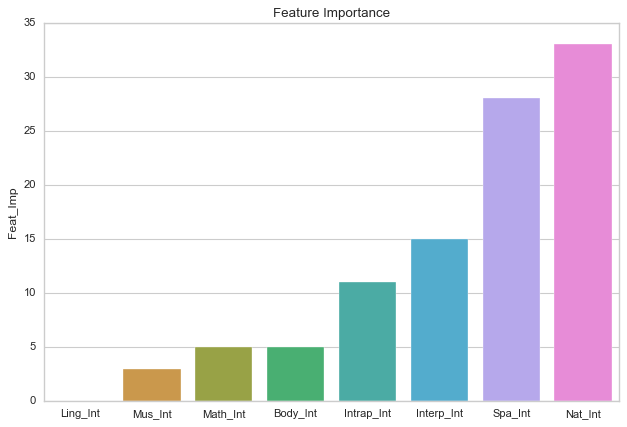

In [58]:
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

### Best Threshold

In [59]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [60]:
from lightgbm import LGBMClassifier 

model = LGBMClassifier(n_estimators = 100,
                       learning_rate = 0.1,
                       max_depth = 2,
                       colsample_bytree = 0.2,
                       subsample = 1)
model.fit(x_train,y_train)

LGBMClassifier(colsample_bytree=0.2, max_depth=2, subsample=1)

In [61]:
y_test_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)

In [62]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data["pred1"] = y_test_pred
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1
83,22,19,13,18,21,18,15,19,1,0.772548,1
53,17,13,18,13,13,22,23,20,1,0.696992,1
70,21,16,16,16,19,18,18,20,1,0.618820,1
45,14,14,15,26,20,13,20,14,1,0.608641,1
44,16,17,16,17,21,19,18,20,0,0.595179,1


In [63]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 5 11]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.54      0.93      0.68        14

    accuracy                           0.60        30
   macro avg       0.69      0.62      0.57        30
weighted avg       0.70      0.60      0.56        30



In [64]:
y_train_pred_proba = model.predict_proba(x_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.5812594780151241

In [65]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2
83,22,19,13,18,21,18,15,19,1,0.772548,1,1
53,17,13,18,13,13,22,23,20,1,0.696992,1,1
70,21,16,16,16,19,18,18,20,1,0.618820,1,1
45,14,14,15,26,20,13,20,14,1,0.608641,1,1
44,16,17,16,17,21,19,18,20,0,0.595179,1,1


In [66]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 6 10]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.55      0.86      0.67        14

    accuracy                           0.60        30
   macro avg       0.65      0.62      0.58        30
weighted avg       0.65      0.60      0.58        30



In [67]:
y_train_pred_proba = model.predict_proba(x_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.5230925459765694

In [68]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2,pred3
83,22,19,13,18,21,18,15,19,1,0.772548,1,1,1
53,17,13,18,13,13,22,23,20,1,0.696992,1,1,1
70,21,16,16,16,19,18,18,20,1,0.618820,1,1,1
45,14,14,15,26,20,13,20,14,1,0.608641,1,1,1
44,16,17,16,17,21,19,18,20,0,0.595179,1,1,1


In [69]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[ 5 11]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.54      0.93      0.68        14

    accuracy                           0.60        30
   macro avg       0.69      0.62      0.57        30
weighted avg       0.70      0.60      0.56        30



### Prediction

In [70]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 100,
                       learning_rate = 0.1,
                       max_depth = 2,
                       colsample_bytree = 0.2,
                       subsample = 1)
model.fit(x, y)

LGBMClassifier(colsample_bytree=0.2, max_depth=2, subsample=1)

In [71]:
columns_name = x.columns

In [72]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [73]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.5812594780151241

optimal_threshold_prc: 0.5230925459765694


In [74]:
predictions1 = model.predict(pred_data)[0]
predictions1

1

In [75]:
predictions_proba = model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.36630622 0.63369378]
0.3663062158183338
0.6336937841816662


In [76]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

1

In [77]:
pred_data["pred1"] = predictions1
pred_data["pred_proba"] = predictions_proba[0][0]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba,pred2
0,35,36,34,37,15,17,19,21,1,0.366306,1


In [78]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_rac

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.5812594780151241
Predictions_Proba	: 0.6336937841816662
Prediction		: 1
Result			: Pilot
